In [595]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [596]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [597]:
NUM_CLASSES = 12

# Dataset reading

In [598]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (42) + 1)))

In [599]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [600]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [601]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((42, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [602]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_56 (Dropout)        (None, 42)                0         
                                                                 
 dense_84 (Dense)            (None, 20)                860       
                                                                 
 dropout_57 (Dropout)        (None, 20)                0         
                                                                 
 dense_85 (Dense)            (None, 10)                210       
                                                                 
 dense_86 (Dense)            (None, 12)                132       
                                                                 
Total params: 1,202
Trainable params: 1,202
Non-trainable params: 0
_________________________________________________________________


In [603]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [604]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [605]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
1/2 [==============>...............] - ETA: 1s - loss: 2.4963 - accuracy: 0.0859
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 2s 327ms/step - loss: 2.4991 - accuracy: 0.0788 - val_loss: 2.4858 - val_accuracy: 0.0000e+00
Epoch 2/1000
1/2 [==============>...............] - ETA: 0s - loss: 2.4942 - accuracy: 0.0469
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 126ms/step - loss: 2.4890 - accuracy: 0.0545 - val_loss: 2.4797 - val_accuracy: 0.0000e+00
Epoch 3/1000
1/2 [==============>...............] - ETA: 0s - loss: 2.4858 - accuracy: 0.0625
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 96ms/step - loss: 2.4801 - accuracy: 0.0606 - val_loss: 2.4739 - val_accuracy: 0.0000e+00
Epoch 4/1000
1/2 [==============>...............] - ETA: 0s - loss: 2.4779 - accuracy: 0.109

1/2 [==============>...............] - ETA: 0s - loss: 2.3502 - accuracy: 0.1406
Epoch 28: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 57ms/step - loss: 2.3465 - accuracy: 0.1333 - val_loss: 2.3742 - val_accuracy: 0.0714
Epoch 29/1000
1/2 [==============>...............] - ETA: 0s - loss: 2.3138 - accuracy: 0.1719
Epoch 29: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 53ms/step - loss: 2.3462 - accuracy: 0.1394 - val_loss: 2.3702 - val_accuracy: 0.0714
Epoch 30/1000
1/2 [==============>...............] - ETA: 0s - loss: 2.3192 - accuracy: 0.1562
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 80ms/step - loss: 2.3474 - accuracy: 0.1394 - val_loss: 2.3664 - val_accuracy: 0.0714
Epoch 31/1000
1/2 [==============>...............] - ETA: 0s - loss: 2.3158 - accuracy: 0.1562
Epoch 31: saving mo

2/2 [==============================] - 0s 62ms/step - loss: 2.1953 - accuracy: 0.1758 - val_loss: 2.2486 - val_accuracy: 0.1071
Epoch 56/1000
1/2 [==============>...............] - ETA: 0s - loss: 2.1736 - accuracy: 0.1797
Epoch 56: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 57ms/step - loss: 2.1796 - accuracy: 0.1818 - val_loss: 2.2431 - val_accuracy: 0.1071
Epoch 57/1000
1/2 [==============>...............] - ETA: 0s - loss: 2.1764 - accuracy: 0.1406
Epoch 57: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 58ms/step - loss: 2.1740 - accuracy: 0.1455 - val_loss: 2.2376 - val_accuracy: 0.1071
Epoch 58/1000
1/2 [==============>...............] - ETA: 0s - loss: 2.1397 - accuracy: 0.1719
Epoch 58: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 61ms/step - loss: 2.1643 - accuracy: 0.1576 - val_loss: 2.

Epoch 83/1000
1/2 [==============>...............] - ETA: 0s - loss: 2.0185 - accuracy: 0.2031
Epoch 83: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 60ms/step - loss: 2.0018 - accuracy: 0.2242 - val_loss: 2.0840 - val_accuracy: 0.1429
Epoch 84/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.9904 - accuracy: 0.1875
Epoch 84: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 58ms/step - loss: 2.0014 - accuracy: 0.2061 - val_loss: 2.0786 - val_accuracy: 0.1429
Epoch 85/1000
1/2 [==============>...............] - ETA: 0s - loss: 2.0390 - accuracy: 0.1797
Epoch 85: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 57ms/step - loss: 2.0130 - accuracy: 0.2000 - val_loss: 2.0731 - val_accuracy: 0.1786
Epoch 86/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.9507 - accuracy: 0.2422
Epoch

1/2 [==============>...............] - ETA: 0s - loss: 1.9009 - accuracy: 0.2266
Epoch 110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 57ms/step - loss: 1.8809 - accuracy: 0.2424 - val_loss: 1.9250 - val_accuracy: 0.1964
Epoch 111/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.8542 - accuracy: 0.2500
Epoch 111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 76ms/step - loss: 1.8488 - accuracy: 0.2485 - val_loss: 1.9201 - val_accuracy: 0.1964
Epoch 112/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.8201 - accuracy: 0.2812
Epoch 112: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 57ms/step - loss: 1.8512 - accuracy: 0.2788 - val_loss: 1.9153 - val_accuracy: 0.1964
Epoch 113/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.8413 - accuracy: 0.2891
Epoch 113: sa

1/2 [==============>...............] - ETA: 0s - loss: 1.7310 - accuracy: 0.2422
Epoch 137: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 63ms/step - loss: 1.7341 - accuracy: 0.2727 - val_loss: 1.7985 - val_accuracy: 0.2143
Epoch 138/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.7599 - accuracy: 0.2891
Epoch 138: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 57ms/step - loss: 1.7767 - accuracy: 0.2606 - val_loss: 1.7945 - val_accuracy: 0.2143
Epoch 139/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.7146 - accuracy: 0.3047
Epoch 139: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 56ms/step - loss: 1.7257 - accuracy: 0.2788 - val_loss: 1.7900 - val_accuracy: 0.2143
Epoch 140/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.7183 - accuracy: 0.2969
Epoch 140: sa

1/2 [==============>...............] - ETA: 0s - loss: 1.6315 - accuracy: 0.3828
Epoch 164: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 58ms/step - loss: 1.6312 - accuracy: 0.3879 - val_loss: 1.6707 - val_accuracy: 0.3036
Epoch 165/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.5982 - accuracy: 0.3516
Epoch 165: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 57ms/step - loss: 1.6242 - accuracy: 0.3455 - val_loss: 1.6652 - val_accuracy: 0.3036
Epoch 166/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.6350 - accuracy: 0.3125
Epoch 166: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 57ms/step - loss: 1.6316 - accuracy: 0.3212 - val_loss: 1.6593 - val_accuracy: 0.3036
Epoch 167/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.5739 - accuracy: 0.3594
Epoch 167: sa

1/2 [==============>...............] - ETA: 0s - loss: 1.5678 - accuracy: 0.3594
Epoch 191: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 69ms/step - loss: 1.5535 - accuracy: 0.3636 - val_loss: 1.5403 - val_accuracy: 0.3214
Epoch 192/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.4650 - accuracy: 0.3984
Epoch 192: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 57ms/step - loss: 1.4793 - accuracy: 0.4000 - val_loss: 1.5358 - val_accuracy: 0.3036
Epoch 193/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.5047 - accuracy: 0.4062
Epoch 193: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 57ms/step - loss: 1.5091 - accuracy: 0.3879 - val_loss: 1.5309 - val_accuracy: 0.3036
Epoch 194/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.5612 - accuracy: 0.4062
Epoch 194: sa

1/2 [==============>...............] - ETA: 0s - loss: 1.4355 - accuracy: 0.4062
Epoch 218: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 58ms/step - loss: 1.4497 - accuracy: 0.3879 - val_loss: 1.4294 - val_accuracy: 0.3571
Epoch 219/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.4776 - accuracy: 0.3984
Epoch 219: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 61ms/step - loss: 1.4805 - accuracy: 0.3758 - val_loss: 1.4249 - val_accuracy: 0.3571
Epoch 220/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.4301 - accuracy: 0.4453
Epoch 220: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 56ms/step - loss: 1.4322 - accuracy: 0.4364 - val_loss: 1.4202 - val_accuracy: 0.3750
Epoch 221/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.4425 - accuracy: 0.3594
Epoch 221: sa

1/2 [==============>...............] - ETA: 0s - loss: 1.4172 - accuracy: 0.4141
Epoch 245: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 54ms/step - loss: 1.3909 - accuracy: 0.4424 - val_loss: 1.3486 - val_accuracy: 0.4464
Epoch 246/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.3116 - accuracy: 0.5312
Epoch 246: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 62ms/step - loss: 1.3180 - accuracy: 0.5152 - val_loss: 1.3449 - val_accuracy: 0.4643
Epoch 247/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.3521 - accuracy: 0.4531
Epoch 247: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 54ms/step - loss: 1.3930 - accuracy: 0.4303 - val_loss: 1.3404 - val_accuracy: 0.4643
Epoch 248/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.4245 - accuracy: 0.4141
Epoch 248: sa

1/2 [==============>...............] - ETA: 0s - loss: 1.3362 - accuracy: 0.4297
Epoch 272: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 60ms/step - loss: 1.3378 - accuracy: 0.4424 - val_loss: 1.2713 - val_accuracy: 0.4821
Epoch 273/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.3594 - accuracy: 0.3984
Epoch 273: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 55ms/step - loss: 1.3535 - accuracy: 0.4121 - val_loss: 1.2710 - val_accuracy: 0.4821
Epoch 274/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.3403 - accuracy: 0.4531
Epoch 274: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 57ms/step - loss: 1.3331 - accuracy: 0.4788 - val_loss: 1.2710 - val_accuracy: 0.4821
Epoch 275/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.2908 - accuracy: 0.4766
Epoch 275: sa

1/2 [==============>...............] - ETA: 0s - loss: 1.2736 - accuracy: 0.4922
Epoch 299: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 78ms/step - loss: 1.2748 - accuracy: 0.5091 - val_loss: 1.2090 - val_accuracy: 0.6964
Epoch 300/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.2220 - accuracy: 0.5547
Epoch 300: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 59ms/step - loss: 1.2392 - accuracy: 0.5455 - val_loss: 1.2071 - val_accuracy: 0.6964
Epoch 301/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.2424 - accuracy: 0.4688
Epoch 301: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 55ms/step - loss: 1.2287 - accuracy: 0.5152 - val_loss: 1.2053 - val_accuracy: 0.7321
Epoch 302/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.3011 - accuracy: 0.5078
Epoch 302: sa

1/2 [==============>...............] - ETA: 0s - loss: 1.2154 - accuracy: 0.5703
Epoch 326: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 57ms/step - loss: 1.2325 - accuracy: 0.5455 - val_loss: 1.1496 - val_accuracy: 0.7143
Epoch 327/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.2762 - accuracy: 0.5078
Epoch 327: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 54ms/step - loss: 1.2537 - accuracy: 0.5212 - val_loss: 1.1482 - val_accuracy: 0.7143
Epoch 328/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.2090 - accuracy: 0.5234
Epoch 328: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 73ms/step - loss: 1.2238 - accuracy: 0.5030 - val_loss: 1.1475 - val_accuracy: 0.7143
Epoch 329/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.1990 - accuracy: 0.5156
Epoch 329: sa

1/2 [==============>...............] - ETA: 0s - loss: 1.1952 - accuracy: 0.4609
Epoch 353: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 58ms/step - loss: 1.2035 - accuracy: 0.4727 - val_loss: 1.0989 - val_accuracy: 0.6964
Epoch 354/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.1214 - accuracy: 0.5469
Epoch 354: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 59ms/step - loss: 1.1295 - accuracy: 0.5455 - val_loss: 1.0952 - val_accuracy: 0.6964
Epoch 355/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.1912 - accuracy: 0.5000
Epoch 355: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 53ms/step - loss: 1.1885 - accuracy: 0.5091 - val_loss: 1.0918 - val_accuracy: 0.6964
Epoch 356/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.2290 - accuracy: 0.5312
Epoch 356: sa

1/2 [==============>...............] - ETA: 0s - loss: 1.2027 - accuracy: 0.5859
Epoch 380: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 54ms/step - loss: 1.1994 - accuracy: 0.5818 - val_loss: 1.0495 - val_accuracy: 0.6964
Epoch 381/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.1715 - accuracy: 0.5078
Epoch 381: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 55ms/step - loss: 1.1617 - accuracy: 0.5030 - val_loss: 1.0457 - val_accuracy: 0.7143
Epoch 382/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.1680 - accuracy: 0.5000
Epoch 382: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 59ms/step - loss: 1.1341 - accuracy: 0.5455 - val_loss: 1.0410 - val_accuracy: 0.7143
Epoch 383/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.1618 - accuracy: 0.5781
Epoch 383: sa

1/2 [==============>...............] - ETA: 0s - loss: 1.1213 - accuracy: 0.5625
Epoch 407: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 58ms/step - loss: 1.1343 - accuracy: 0.5394 - val_loss: 1.0020 - val_accuracy: 0.7143
Epoch 408/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.0548 - accuracy: 0.5391
Epoch 408: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 58ms/step - loss: 1.1098 - accuracy: 0.5152 - val_loss: 1.0018 - val_accuracy: 0.7143
Epoch 409/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.1421 - accuracy: 0.5469
Epoch 409: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 60ms/step - loss: 1.1448 - accuracy: 0.5273 - val_loss: 1.0003 - val_accuracy: 0.7143
Epoch 410/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.1843 - accuracy: 0.5469
Epoch 410: sa

1/2 [==============>...............] - ETA: 0s - loss: 1.1453 - accuracy: 0.5312
Epoch 434: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 60ms/step - loss: 1.1378 - accuracy: 0.5212 - val_loss: 0.9595 - val_accuracy: 0.7500
Epoch 435/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.0362 - accuracy: 0.5781
Epoch 435: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 53ms/step - loss: 1.0493 - accuracy: 0.5576 - val_loss: 0.9605 - val_accuracy: 0.7500
Epoch 436/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.9725 - accuracy: 0.6328
Epoch 436: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 63ms/step - loss: 0.9841 - accuracy: 0.6242 - val_loss: 0.9601 - val_accuracy: 0.7500
Epoch 437/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.0256 - accuracy: 0.6328
Epoch 437: sa

1/2 [==============>...............] - ETA: 0s - loss: 1.0579 - accuracy: 0.6094
Epoch 461: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 57ms/step - loss: 1.0264 - accuracy: 0.6000 - val_loss: 0.9129 - val_accuracy: 0.7500
Epoch 462/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.0910 - accuracy: 0.5781
Epoch 462: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 54ms/step - loss: 1.0984 - accuracy: 0.5636 - val_loss: 0.9122 - val_accuracy: 0.7500
Epoch 463/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.0107 - accuracy: 0.5859
Epoch 463: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 55ms/step - loss: 1.0289 - accuracy: 0.5758 - val_loss: 0.9119 - val_accuracy: 0.7500
Epoch 464/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.0592 - accuracy: 0.6016
Epoch 464: sa

1/2 [==============>...............] - ETA: 0s - loss: 0.9779 - accuracy: 0.6328
Epoch 488: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 74ms/step - loss: 0.9619 - accuracy: 0.6424 - val_loss: 0.8621 - val_accuracy: 0.7679
Epoch 489/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.0617 - accuracy: 0.5703
Epoch 489: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 60ms/step - loss: 1.0604 - accuracy: 0.5818 - val_loss: 0.8593 - val_accuracy: 0.7679
Epoch 490/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.0100 - accuracy: 0.5938
Epoch 490: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 59ms/step - loss: 0.9827 - accuracy: 0.6121 - val_loss: 0.8567 - val_accuracy: 0.7679
Epoch 491/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.9998 - accuracy: 0.5703
Epoch 491: sa

1/2 [==============>...............] - ETA: 0s - loss: 0.9196 - accuracy: 0.6484
Epoch 515: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 54ms/step - loss: 0.9533 - accuracy: 0.6485 - val_loss: 0.8172 - val_accuracy: 0.8214
Epoch 516/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.9551 - accuracy: 0.6797
Epoch 516: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 55ms/step - loss: 0.9852 - accuracy: 0.6424 - val_loss: 0.8167 - val_accuracy: 0.8214
Epoch 517/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.9625 - accuracy: 0.6172
Epoch 517: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 56ms/step - loss: 0.9671 - accuracy: 0.6182 - val_loss: 0.8169 - val_accuracy: 0.8393
Epoch 518/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.0416 - accuracy: 0.5781
Epoch 518: sa

1/2 [==============>...............] - ETA: 0s - loss: 0.9957 - accuracy: 0.6016
Epoch 542: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 55ms/step - loss: 1.0080 - accuracy: 0.5879 - val_loss: 0.7976 - val_accuracy: 0.7679
Epoch 543/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.9460 - accuracy: 0.6875
Epoch 543: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 55ms/step - loss: 0.9375 - accuracy: 0.6727 - val_loss: 0.7979 - val_accuracy: 0.7679
Epoch 544/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.9795 - accuracy: 0.5859
Epoch 544: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 76ms/step - loss: 0.9830 - accuracy: 0.5879 - val_loss: 0.7983 - val_accuracy: 0.7500
Epoch 545/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.8864 - accuracy: 0.6250
Epoch 545: sa

1/2 [==============>...............] - ETA: 0s - loss: 0.9873 - accuracy: 0.6250
Epoch 569: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 57ms/step - loss: 1.0401 - accuracy: 0.5697 - val_loss: 0.7578 - val_accuracy: 0.8929
Epoch 570/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.9496 - accuracy: 0.6094
Epoch 570: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 52ms/step - loss: 0.9574 - accuracy: 0.6000 - val_loss: 0.7563 - val_accuracy: 0.8929
Epoch 571/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.0234 - accuracy: 0.6016
Epoch 571: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 53ms/step - loss: 1.0080 - accuracy: 0.5879 - val_loss: 0.7547 - val_accuracy: 0.9286
Epoch 572/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.0227 - accuracy: 0.5781
Epoch 572: sa

1/2 [==============>...............] - ETA: 0s - loss: 0.9566 - accuracy: 0.6094
Epoch 596: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 60ms/step - loss: 0.9624 - accuracy: 0.6000 - val_loss: 0.7246 - val_accuracy: 0.9286
Epoch 597/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.0007 - accuracy: 0.5938
Epoch 597: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 61ms/step - loss: 1.0551 - accuracy: 0.5758 - val_loss: 0.7261 - val_accuracy: 0.9107
Epoch 598/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.9631 - accuracy: 0.6016
Epoch 598: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 58ms/step - loss: 0.9775 - accuracy: 0.5939 - val_loss: 0.7286 - val_accuracy: 0.9107
Epoch 599/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.8921 - accuracy: 0.6406
Epoch 599: sa

1/2 [==============>...............] - ETA: 0s - loss: 0.8700 - accuracy: 0.6328
Epoch 623: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 59ms/step - loss: 0.8798 - accuracy: 0.6182 - val_loss: 0.6953 - val_accuracy: 0.9464
Epoch 624/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.9403 - accuracy: 0.6016
Epoch 624: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 61ms/step - loss: 0.9086 - accuracy: 0.6182 - val_loss: 0.6930 - val_accuracy: 0.9464
Epoch 625/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.8413 - accuracy: 0.7031
Epoch 625: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 55ms/step - loss: 0.8494 - accuracy: 0.6970 - val_loss: 0.6912 - val_accuracy: 0.9464
Epoch 626/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.9473 - accuracy: 0.6328
Epoch 626: sa

1/2 [==============>...............] - ETA: 0s - loss: 0.9692 - accuracy: 0.5625
Epoch 650: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 58ms/step - loss: 0.9393 - accuracy: 0.5939 - val_loss: 0.6595 - val_accuracy: 0.9464
Epoch 651/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.8799 - accuracy: 0.6172
Epoch 651: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 59ms/step - loss: 0.8924 - accuracy: 0.6182 - val_loss: 0.6589 - val_accuracy: 0.9464
Epoch 652/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.9254 - accuracy: 0.6094
Epoch 652: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 56ms/step - loss: 0.9675 - accuracy: 0.5818 - val_loss: 0.6595 - val_accuracy: 0.9464
Epoch 653/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.9105 - accuracy: 0.6328
Epoch 653: sa

1/2 [==============>...............] - ETA: 0s - loss: 0.9417 - accuracy: 0.5938
Epoch 677: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 58ms/step - loss: 0.8766 - accuracy: 0.6485 - val_loss: 0.6375 - val_accuracy: 0.9286
Epoch 678/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.8781 - accuracy: 0.6719
Epoch 678: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 57ms/step - loss: 0.8775 - accuracy: 0.6788 - val_loss: 0.6353 - val_accuracy: 0.9286
Epoch 679/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.9026 - accuracy: 0.6016
Epoch 679: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 56ms/step - loss: 0.9104 - accuracy: 0.6000 - val_loss: 0.6324 - val_accuracy: 0.9286
Epoch 680/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.7837 - accuracy: 0.7188
Epoch 680: sa

1/2 [==============>...............] - ETA: 0s - loss: 0.9173 - accuracy: 0.6484
Epoch 704: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 53ms/step - loss: 0.9044 - accuracy: 0.6667 - val_loss: 0.6015 - val_accuracy: 0.9286
Epoch 705/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.8946 - accuracy: 0.5938
Epoch 705: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 56ms/step - loss: 0.8834 - accuracy: 0.6182 - val_loss: 0.6020 - val_accuracy: 0.9286
Epoch 706/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.8476 - accuracy: 0.6484
Epoch 706: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 57ms/step - loss: 0.8524 - accuracy: 0.6545 - val_loss: 0.6016 - val_accuracy: 0.9286
Epoch 707/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.9336 - accuracy: 0.6797
Epoch 707: sa

1/2 [==============>...............] - ETA: 0s - loss: 0.7686 - accuracy: 0.6719
Epoch 731: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 58ms/step - loss: 0.7961 - accuracy: 0.6788 - val_loss: 0.5941 - val_accuracy: 0.9464
Epoch 732/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.9285 - accuracy: 0.6406
Epoch 732: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 58ms/step - loss: 0.9007 - accuracy: 0.6727 - val_loss: 0.5918 - val_accuracy: 0.9464
Epoch 733/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.8816 - accuracy: 0.6172
Epoch 733: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 53ms/step - loss: 0.8569 - accuracy: 0.6242 - val_loss: 0.5899 - val_accuracy: 0.9464
Epoch 734/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.8632 - accuracy: 0.6719
Epoch 734: sa

1/2 [==============>...............] - ETA: 0s - loss: 0.8473 - accuracy: 0.6641
Epoch 758: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 64ms/step - loss: 0.8465 - accuracy: 0.6788 - val_loss: 0.5666 - val_accuracy: 0.9464
Epoch 759/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.8103 - accuracy: 0.6875
Epoch 759: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 55ms/step - loss: 0.8124 - accuracy: 0.7091 - val_loss: 0.5674 - val_accuracy: 0.9464
Epoch 760/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.7966 - accuracy: 0.7031
Epoch 760: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 54ms/step - loss: 0.7735 - accuracy: 0.7212 - val_loss: 0.5669 - val_accuracy: 0.9464
Epoch 761/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.8374 - accuracy: 0.6953
Epoch 761: sa

1/2 [==============>...............] - ETA: 0s - loss: 0.7810 - accuracy: 0.7031
Epoch 785: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 59ms/step - loss: 0.7932 - accuracy: 0.6848 - val_loss: 0.5485 - val_accuracy: 0.9464
Epoch 786/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.7681 - accuracy: 0.7500
Epoch 786: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 57ms/step - loss: 0.8529 - accuracy: 0.7152 - val_loss: 0.5467 - val_accuracy: 0.9464
Epoch 787/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.8088 - accuracy: 0.6641
Epoch 787: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 56ms/step - loss: 0.7947 - accuracy: 0.6788 - val_loss: 0.5449 - val_accuracy: 0.9464
Epoch 788/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.8302 - accuracy: 0.7188
Epoch 788: sa

1/2 [==============>...............] - ETA: 0s - loss: 0.7271 - accuracy: 0.7188
Epoch 812: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 57ms/step - loss: 0.7829 - accuracy: 0.6970 - val_loss: 0.5392 - val_accuracy: 0.9464
Epoch 813/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.8578 - accuracy: 0.6484
Epoch 813: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 57ms/step - loss: 0.8800 - accuracy: 0.6303 - val_loss: 0.5379 - val_accuracy: 0.9464
Epoch 814/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.8865 - accuracy: 0.6562
Epoch 814: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 64ms/step - loss: 0.8572 - accuracy: 0.6788 - val_loss: 0.5373 - val_accuracy: 0.9464
Epoch 815/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.7002 - accuracy: 0.7188
Epoch 815: sa

1/2 [==============>...............] - ETA: 0s - loss: 0.8026 - accuracy: 0.7031
Epoch 839: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 58ms/step - loss: 0.7824 - accuracy: 0.7091 - val_loss: 0.5100 - val_accuracy: 0.9643
Epoch 840/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.6675 - accuracy: 0.8047
Epoch 840: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 57ms/step - loss: 0.7098 - accuracy: 0.7758 - val_loss: 0.5097 - val_accuracy: 0.9643
Epoch 841/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.7181 - accuracy: 0.6875
Epoch 841: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 57ms/step - loss: 0.7570 - accuracy: 0.6545 - val_loss: 0.5090 - val_accuracy: 0.9643
Epoch 842/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.7827 - accuracy: 0.7188
Epoch 842: sa

1/2 [==============>...............] - ETA: 0s - loss: 0.7943 - accuracy: 0.7109
Epoch 866: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 65ms/step - loss: 0.8290 - accuracy: 0.6848 - val_loss: 0.4911 - val_accuracy: 0.9643
Epoch 867/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.7394 - accuracy: 0.6953
Epoch 867: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 53ms/step - loss: 0.7682 - accuracy: 0.6848 - val_loss: 0.4898 - val_accuracy: 0.9643
Epoch 868/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.7315 - accuracy: 0.7188
Epoch 868: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 52ms/step - loss: 0.7451 - accuracy: 0.7212 - val_loss: 0.4896 - val_accuracy: 0.9643
Epoch 869/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.7588 - accuracy: 0.7344
Epoch 869: sa

1/2 [==============>...............] - ETA: 0s - loss: 0.7221 - accuracy: 0.7031
Epoch 893: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 58ms/step - loss: 0.7365 - accuracy: 0.6970 - val_loss: 0.4705 - val_accuracy: 0.9643
Epoch 894/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.7255 - accuracy: 0.7422
Epoch 894: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 55ms/step - loss: 0.6913 - accuracy: 0.7697 - val_loss: 0.4695 - val_accuracy: 0.9643
Epoch 895/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.7022 - accuracy: 0.7656
Epoch 895: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 56ms/step - loss: 0.7444 - accuracy: 0.7394 - val_loss: 0.4688 - val_accuracy: 0.9643
Epoch 896/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.6809 - accuracy: 0.7344
Epoch 896: sa

1/2 [==============>...............] - ETA: 0s - loss: 0.6663 - accuracy: 0.7734
Epoch 920: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 56ms/step - loss: 0.6935 - accuracy: 0.7697 - val_loss: 0.4523 - val_accuracy: 0.9643
Epoch 921/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.7833 - accuracy: 0.7188
Epoch 921: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 57ms/step - loss: 0.7559 - accuracy: 0.7273 - val_loss: 0.4499 - val_accuracy: 0.9643
Epoch 922/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.6870 - accuracy: 0.7422
Epoch 922: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 55ms/step - loss: 0.6854 - accuracy: 0.7455 - val_loss: 0.4485 - val_accuracy: 0.9643
Epoch 923/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.7812 - accuracy: 0.6797
Epoch 923: sa

1/2 [==============>...............] - ETA: 0s - loss: 0.8335 - accuracy: 0.6875
Epoch 947: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 56ms/step - loss: 0.7855 - accuracy: 0.7333 - val_loss: 0.4436 - val_accuracy: 0.9643
Epoch 948/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.7715 - accuracy: 0.7109
Epoch 948: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 68ms/step - loss: 0.7392 - accuracy: 0.7333 - val_loss: 0.4434 - val_accuracy: 0.9643
Epoch 949/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.8824 - accuracy: 0.6953
Epoch 949: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 60ms/step - loss: 0.8515 - accuracy: 0.7030 - val_loss: 0.4433 - val_accuracy: 0.9464
Epoch 950/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.7394 - accuracy: 0.6875
Epoch 950: sa

1/2 [==============>...............] - ETA: 0s - loss: 0.7688 - accuracy: 0.6875
Epoch 974: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 63ms/step - loss: 0.7260 - accuracy: 0.7152 - val_loss: 0.4328 - val_accuracy: 0.9643
Epoch 975/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.7608 - accuracy: 0.7266
Epoch 975: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 55ms/step - loss: 0.8225 - accuracy: 0.6788 - val_loss: 0.4325 - val_accuracy: 0.9643
Epoch 976/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.8118 - accuracy: 0.6953
Epoch 976: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 52ms/step - loss: 0.7772 - accuracy: 0.7091 - val_loss: 0.4328 - val_accuracy: 0.9643
Epoch 977/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.7112 - accuracy: 0.7344
Epoch 977: sa

In [606]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

1/1 [==============================] - 0s 25ms/step - loss: 0.4220 - accuracy: 0.9643


In [607]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [608]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 66ms/step
[3.4626431e-09 9.7387746e-02 1.4553241e-04 6.2147212e-01 6.5750578e-06
 2.4764568e-01 3.3077963e-02 1.5358038e-08 3.9333696e-09 2.6415521e-04
 1.3718350e-10 2.4542788e-07]
3


# Confusion matrix

2/2 [==============================] - 0s 2ms/step


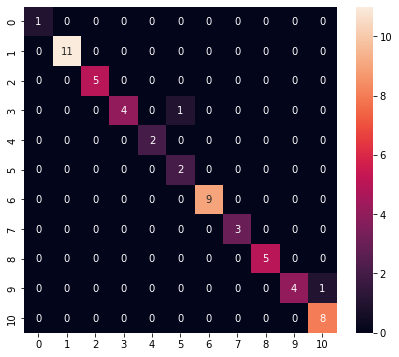

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         5
           3       1.00      0.80      0.89         5
           4       1.00      1.00      1.00         2
           5       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         5
           9       1.00      0.80      0.89         5
          10       0.89      1.00      0.94         8

    accuracy                           0.96        56
   macro avg       0.96      0.96      0.96        56
weighted avg       0.97      0.96      0.96        56



In [609]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [610]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [611]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\facut\AppData\Local\Temp\tmpk6bs10pq\assets


INFO:tensorflow:Assets written to: C:\Users\facut\AppData\Local\Temp\tmpk6bs10pq\assets


6920

# Inference test

In [612]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [613]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [614]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [615]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [616]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[3.4626448e-09 9.7387657e-02 1.4553263e-04 6.2147242e-01 6.5750610e-06
 2.4764553e-01 3.3077899e-02 1.5358015e-08 3.9333710e-09 2.6415495e-04
 1.3718331e-10 2.4542751e-07]
3
